In [1]:
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup
from env import github_token, github_username
import acquire as aqr
import prepare as prep
import explore as exp
import json
import nltk

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Specify the file name where you want to save the list
file_name = "repo_processed.json"

# Load the REPOS list from the JSON file
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)

In [3]:
repos_df = pd.DataFrame(repo_loaded)
repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


In [4]:
extra_words = []
exclude_words = []
repos_df = prep.process_dataframe(repos_df, extra_words, exclude_words)

In [5]:
repos_df

,repo,language,original,clean,remove_stopwords,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...,awesome robotics\n\n\nawesomehttpscdnrawgitcom...,awesome robotics awesomehttpscdnrawgitcomsindr...,awesom robot awesomehttpscdnrawgitcomsindresor...,awesome robotics awesomehttpscdnrawgitcomsindr...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",modern robotics mechanics planning and control...,modern robotics mechanics planning control cod...,modern robot mechan plan control code librari ...,modern robotics mechanic planning control code...
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...,httpsmithigithubiodeepblueberry httpskoficommi...,httpsmithigithubiodeepblueberry httpskoficommi...,httpsmithigithubiodeepblueberri httpskoficommi...,httpsmithigithubiodeepblueberry httpskoficommi...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,cpprobotics\n\nthis is the cpp implementation ...,cpprobotics cpp implementation pythonroboticsh...,cpprobot cpp implement pythonroboticshttpsgith...,cpprobotics cpp implementation pythonroboticsh...
...,...,...,...,...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...,dingtalk\n\ngohttpsgithubcomcatchzengdingtalkw...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...,httpswwwbilibilicomvideoav82675511 httpsdocter...,httpswwwbilibilicomvideoav82675511 httpsdocter...,httpswwwbilibilicomvideoav82675511 httpsdocter...,httpswwwbilibilicomvideoav82675511 httpsdocter...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...,pkg update pkg upgrade\npkg install bash\npkg ...,pkg update pkg upgrade pkg install bash pkg in...,pkg updat pkg upgrad pkg instal bash pkg insta...,pkg update pkg upgrade pkg install bash pkg in...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont...",style\npre whitespacepre \nheadercontentfootno...,style pre whitespacepre headercontentfootnotes...,style pre whitespacepr headercontentfootnotesf...,style pre whitespacepre headercontentfootnotes...


In [6]:
repos_df['clean'].str.contains('&#9;').sum()

0

In [10]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repo           677 non-null    object
 1   language       615 non-null    object
 2   lemmatized     677 non-null    object
 3   un_lemmatized  677 non-null    object
dtypes: object(4)
memory usage: 21.3+ KB


In [7]:
# repos_df['readme'] = repos_df['lemmatized']
repos_df['un_lemmatized'] = repos_df['remove_stopwords']


In [9]:
repos_df = repos_df.drop(columns=['original', 'clean', 'remove_stopwords', 'stemmed'])#, 'lemmatized'])

In [9]:
repos_df

,repo,language,readme
0,AtsushiSakai/PythonRobotics,Python,img srchttpsgithubcomatsushisakaipythonrobotic...
1,kiloreux/awesome-robotics,None,awesome robotics awesomehttpscdnrawgitcomsindr...
2,NxRLab/ModernRobotics,Python,modern robotics mechanics planning control cod...
3,mithi/robotics-coursework,None,httpsmithigithubiodeepblueberry httpskoficommi...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonroboticsh...
...,...,...,...
672,CatchZeng/dingtalk,Go,dingtalk gohttpsgithubcomcatchzengdingtalkwork...
673,1c7/Translate-Subtitle-File,None,httpswwwbilibilicomvideoav82675511 httpsdocter...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update pkg upgrade pkg install bash pkg in...
675,cirosantilli/china-dictatorship,HTML,style pre whitespacepre headercontentfootnotes...


In [10]:
len(repos_df)

677

In [11]:
repos_df.iloc[668].readme

'please find project inside zip file contain multiple folders 9 state folder find statepy file 9 agent inside folder get agentpy file 9 tradingipynb file contains functionality 31data preprocessing 32agent trained 51 episode input following parameters stock1name first stock name apple aaplus stock2name second stock name amazon amznus episodecount number episodes agent till train startbalance initial starting cash 10000 training number records used trading ie number days episode training run test number days test run executed 33evaluate final program predict total portfolio value one episode models saved model directory execute program would need run tradingipynb file input stated look result files testing google n walmartipynb testingibm n geipynb used test model generated tradingipynb stored models directory references 9 machine learning trading gordon ritter httpscimsnyueduritterritter2017machinepdf 9 financial trading game deep reinforcement learning approach huang chienyi httpsarxi

In [12]:
repos_df['readme'].str.contains('&#9;')

0      False
1      False
2      False
3      False
4      False
       ...  
672    False
673    False
674    False
675    False
676    False
Name: readme, Length: 677, dtype: bool

In [11]:
# Remove rows where 'language' is None
repos_df = repos_df[repos_df['language'].notna()]

In [12]:
# Remove repos without a readme
repos_df = repos_df[repos_df['readme'] != 'failtoloadreadme']

KeyError: 'readme'

In [ ]:
# List of other technologies, not languages
other_technologies = [
    "CMake"
    "Jupyter Notebook",
    "HTML",
    "Go",
    "Shell",
    "TeX",
    "CMake",
    "Dockerfile",
    "OpenSCAD",
    "MQL5",
    "Vue",
    "Smali",
    "RobotFramework",
    "Cuda",
    "SCSS"
]

repos_df = repos_df[~repos_df['language'].isin(other_technologies)]

In [13]:
# Define a modified categorization function
def categorize_language(language, acceptable_languages):
    if language in acceptable_languages:
        return language
    else:
        return 'Other'

# Define the list of acceptable languages
acceptable_languages = ['C++', 'Python']

# Apply the categorize_language function with the acceptable_languages list
repos_df['language'] = repos_df['language'].apply(categorize_language, args=(acceptable_languages,))


In [14]:
counts = exp.show_counts_and_ratios(repos_df, "language")
counts

,n,percent
language,,
C++,207,0.336585
Other,206,0.334959
Python,202,0.328455


In [18]:
repos_df

,repo,language,readme
0,AtsushiSakai/PythonRobotics,Python,img srchttpsgithubcomatsushisakaipythonrobotic...
2,NxRLab/ModernRobotics,Python,modern robotics mechanics planning control cod...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonroboticsh...
5,JdeRobot/RoboticsAcademy,Other,hrefhttpsjderobotgithubioimg srcimglogogif wid...
6,pptacher/probabilistic_robotics,C++,probabilisticrobotics working detailed solutio...
...,...,...,...
667,Sollimann/bonsai,Other,h1 aligncenter stylefontfamilypapyrus fontsize...
668,sachink2010/AutomatedStockTrading-DeepQ-Learning,Other,please find project inside zip file contain mu...
669,zjunlp/EasyInstruct,Python,div aligncenter img srcfigslogopng width300px ...
670,RajashekarRaju/compose-actors,Other,compose actors dancer roadmap v030 x let users...


In [19]:
type(repos_df)

pandas.core.frame.DataFrame

In [ ]:
%&o^*u*
ou

In [20]:
# Join all the text from the DataFrame where the label is 'ham'
C_repos = ' '.join(repos_df[repos_df.language == 'C++'].readme)

# Join all the text from the DataFrame where the label is 'spam'
Python_repos = ' '.join(repos_df[repos_df.language == 'Python'].readme)

# Join all the text from the DataFrame where the label is 'spam'
other_repos = ' '.join(repos_df[repos_df.language == 'Other'].readme)

# Join all the text from the DataFrame
all_repos = ' '.join(repos_df.readme)

In [21]:
# After lemmatizing the readme, you need to split the words for frequency counting
c_words = repos_df[repos_df.language == 'C++'].readme.str.split(expand=True).stack()
python_words = repos_df[repos_df.language == 'Python'].readme.str.split(expand=True).stack()
other_words = repos_df[repos_df.language == 'Other'].readme.str.split(expand=True).stack()
all_words = repos_df.readme.str.split(expand=True).stack()

In [28]:
all_words

0    0                                                   img
     1     srchttpsgithubcomatsushisakaipythonroboticsraw...
     2                                            alignright
     3                                              width300
     4                                             altheader
                                 ...                        
674  25                                       menggunakannya
     26                                                 lgsg
     27                                                 saja
     28                                                 onex
     29                                                start
Length: 362117, dtype: object

In [22]:
c_freq = pd.Series(c_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

c_freq.head(), python_freq.head(), other_freq.head(), all_freq.head()

(build      1192
 robot       703
 install     642
 ros         630
 use         627
 Name: count, dtype: int64,
 3d          949
 learning    917
 python      882
 using       865
 robot       836
 Name: count, dtype: int64,
 use        435
 img        355
 using      345
 robot      328
 install    307
 Name: count, dtype: int64,
 robot      1867
 using      1810
 install    1732
 use        1685
 build      1582
 Name: count, dtype: int64)

In [33]:
word_counts[word_counts['index']str.contains('ou')]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1150912413.py, line 1)

In [36]:
filtered_rows = word_counts[word_counts.index.str.contains('ou')]

filtered_rows.sort_values(by='all', ascending=False).head(20)

,all,C++,Python,Other
source,724,358,235,131
cloud,389,84,261,44
without,321,102,150,69
found,277,123,100,54
autonomous,266,89,86,91
output,225,86,88,51
would,222,75,76,71
clouds,184,33,140,11
opensource,136,45,58,33
around,131,57,40,34


In [30]:
word_counts = (pd.concat([all_freq, c_freq, python_freq, other_freq], axis=1, sort=True)
                .set_axis(['all', 'C++', 'Python', 'Other'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.sort_values(by='all', ascending=False).head()


,all,C++,Python,Other
robot,1867,703,836,328
using,1810,600,865,345
install,1732,642,783,307
use,1685,627,623,435
build,1582,1192,187,203


In [24]:
# Select the top 6 rows where 'C++' column is 0 and sort by 'Python' column
cpp_zero_py = word_counts[word_counts['C++'] == 0].sort_values(by='Python').tail(6)

# Select the top 6 rows where 'Python' column is 0 and sort by 'C++' column
python_zero_cpp = word_counts[word_counts['Python'] == 0].sort_values(by='C++').tail(6)


# Select the top 6 rows where 'C++' column is 0 and sort by 'Python' column
cpp_zero_other = word_counts[word_counts['C++'] == 0].sort_values(by='Other').tail(6)

# Select the top 6 rows where 'Other' column is 0 and sort by 'C++' column
other_zero_cpp = word_counts[word_counts['Other'] == 0].sort_values(by='C++').tail(6)


# Select the top 6 rows where 'Python' column is 0 and sort by 'C++' column
python_zero_other = word_counts[word_counts['Python'] == 0].sort_values(by='Other').tail(6)

# Select the top 6 rows where 'Other' column is 0 and sort by 'C++' column
other_zero_py = word_counts[word_counts['Other'] == 0].sort_values(by='Python').tail(6)


# Concatenate the three DataFrames
cpp_vs_py = pd.concat([cpp_zero_py, python_zero_cpp, ])#, python_zero_cpp, python_zero_other, other_zero_py, other_zero_cpp])

cpp_vs_other = pd.concat([cpp_zero_other, other_zero_cpp, ])

py_vs_other = pd.concat([python_zero_other, other_zero_py, ])

print(cpp_vs_py)
print('\n')
print(cpp_vs_other)
print('\n')
print(py_vs_other)


                all  C++  Python  Other
selfsupervised   90    0      89      1
width1428a      130    0     130      0
valigntop       132    0     130      2
grasping        177    0     145     32
bicubic         152    0     152      0
radiance        281    0     281      0
doxygen          46   46       0      0
symforce         48   48       0      0
pinocchio        50   50       0      0
ruckig           50   50       0      0
eigen            64   63       0      1
simbody          98   98       0      0


                 all  C++  Python  Other
targetblankenga   82    0       0     82
targetblankrua    98    0       0     98
npm              125    0       6    119
altname          142    0       0    142
aligntop         147    0       0    147
width20px        147    0       0    147
catkinmake        65   53      12      0
elevation         77   62      15      0
hz                72   69       3      0
simbody           98   98       0      0
rviz             200  164  

In [25]:
import matplotlib.pyplot as plt

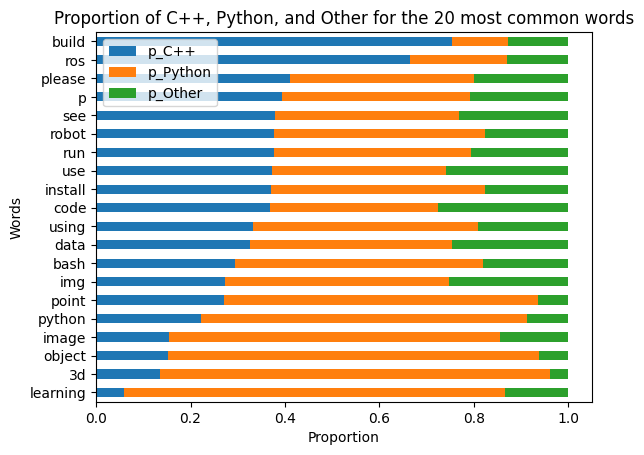

In [26]:
# Calculate the proportions of 'C++', 'Python', and 'Other'
word_counts['p_C++'] = word_counts['C++'] / word_counts['all']
word_counts['p_Python'] = word_counts['Python'] / word_counts['all']
word_counts['p_Other'] = word_counts['Other'] / word_counts['all']


# Select the top 20 rows by 'all' column
top_20_words = word_counts.sort_values(by='all').tail(20)

# Sort the DataFrame by 'p_C++' column
top_20_words = top_20_words.sort_values(by='p_C++')

# Create a stacked bar chart
ax = top_20_words[['p_C++', 'p_Python', 'p_Other']].plot.barh(stacked=True)

# Set plot title and labels
plt.title('Proportion of C++, Python, and Other for the 20 most common words')
plt.xlabel('Proportion')
plt.ylabel('Words')

# Show the plot
plt.show()




In [27]:
# Filter rows where 'C++', 'Python', and 'Other' are greater than 10
filtered_rows = word_counts[(word_counts['C++'] > 10) & (word_counts['Python'] > 10) & (word_counts['Other'] > 10)]

# Calculate the 'ratio' column as a percentage and round to the nearest whole number
filtered_rows.loc[:, 'p_C++'] = ((filtered_rows['C++'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()
filtered_rows.loc[:, 'p_Python'] = ((filtered_rows['Python'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()
filtered_rows.loc[:, 'p_Other'] = ((filtered_rows['Other'] / (filtered_rows['C++'] + filtered_rows['Python'] + filtered_rows['Other'])) * 100).round()

# Sort the DataFrame by 'ratio' column
sorted_df = filtered_rows.sort_values(by='p_C++', ascending= False)

# Select the top and bottom rows using the pipe method
result = sorted_df.pipe(lambda df: pd.concat([df.head(), df.tail()]))

# Display the result
result

,all,C++,Python,Other,p_C++,p_Python,p_Other
cmake,362,320,24,18,88.0,7.0,5.0
imu,156,120,11,25,77.0,7.0,16.0
frame,252,192,40,20,76.0,16.0,8.0
build,1582,1192,187,203,75.0,12.0,13.0
ieee,147,101,32,14,69.0,22.0,10.0
task,176,12,140,24,7.0,80.0,14.0
deep,423,25,326,72,6.0,77.0,17.0
learning,1137,67,917,153,6.0,81.0,13.0
training,546,29,426,91,5.0,78.0,17.0
neural,529,18,482,29,3.0,91.0,5.0


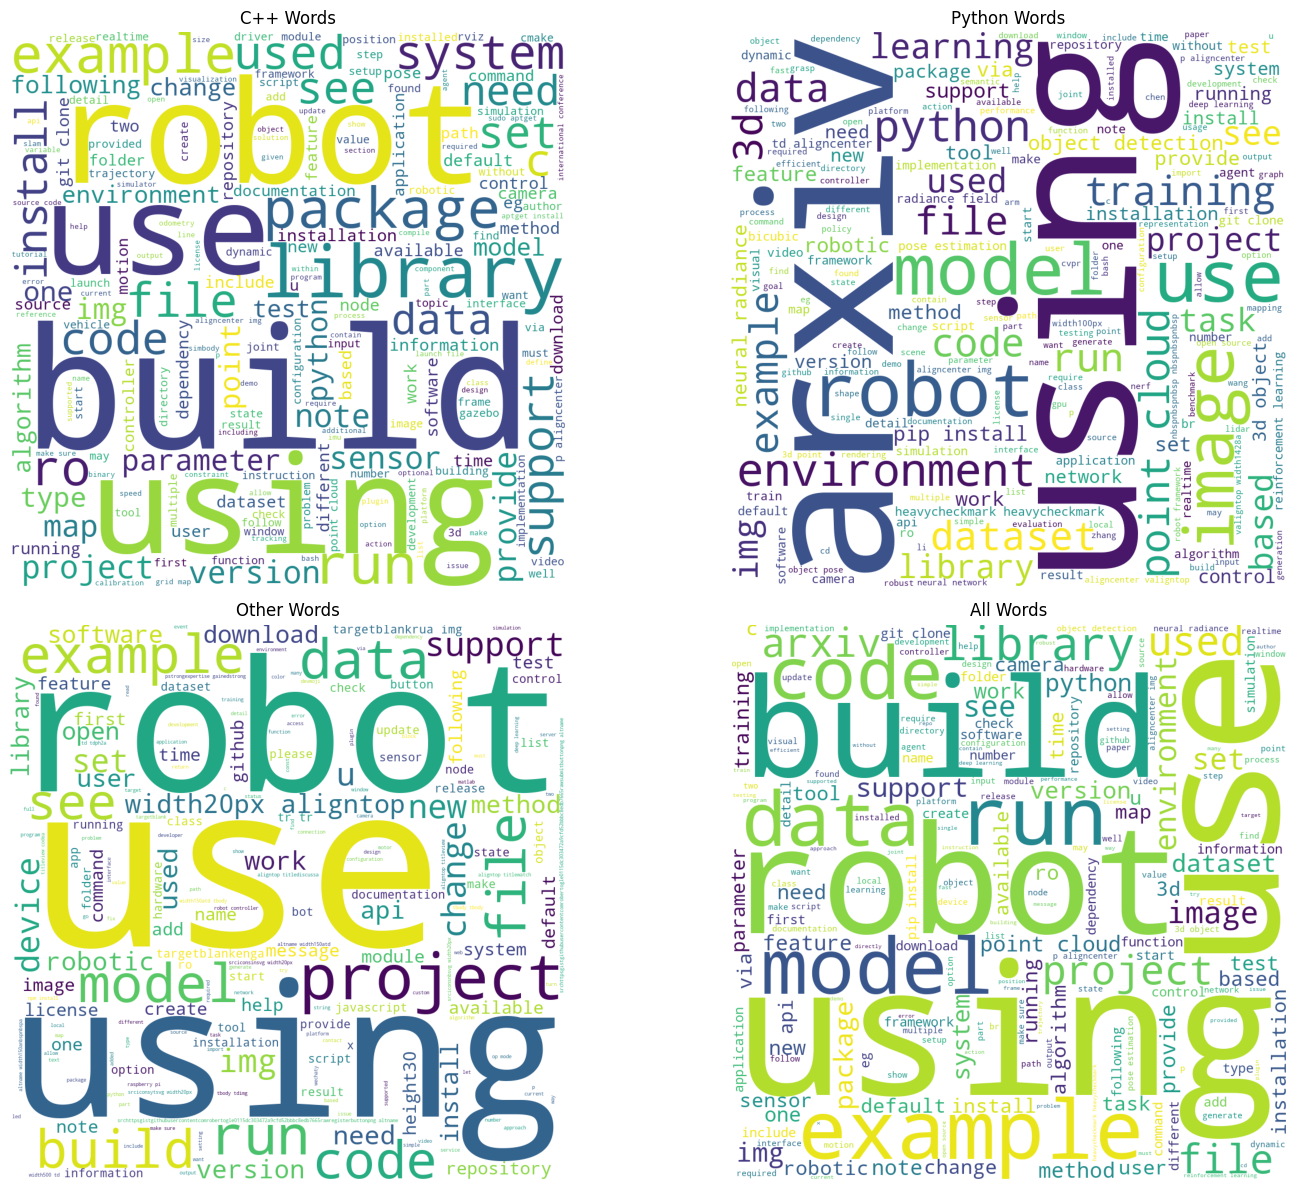

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each set of words
c_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(c_words))
python_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(python_words))
other_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(other_words))
all_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(' '.join(all_words))

# Create subplots for each word cloud
plt.figure(figsize=(16, 12))

# Subplot for C++
plt.subplot(2, 2, 1)
plt.imshow(c_cloud)
plt.title('C++ Words')
plt.axis('off')

# Subplot for Python
plt.subplot(2, 2, 2)
plt.imshow(python_cloud)
plt.title('Python Words')
plt.axis('off')

# Subplot for Other
plt.subplot(2, 2, 3)
plt.imshow(other_cloud)
plt.title('Other Words')
plt.axis('off')

# Subplot for All Words
plt.subplot(2, 2, 4)
plt.imshow(all_cloud)
plt.title('All Words')
plt.axis('off')

plt.tight_layout()
plt.show()


In [153]:
top_20_cpp_bigrams = (pd.Series(nltk.ngrams(c_words, 2))
                      .value_counts()
                      .head(20))

top_20_cpp_bigrams.head()


top_20_py_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_py_bigrams.head()



top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_cpp_bigrams.head(), top_20_py_bigrams.head(), top_20_other_bigrams.head()



((&#9;, &#9;)        504
 (git, clone)        138
 (point, cloud)       97
 (p, aligncenter)     95
 (0, 0)               87
 Name: count, dtype: int64,
 (&#9;, &#9;)           450
 (point, cloud)         374
 (object, detection)    256
 (pip, install)         243
 (neural, radiance)     221
 Name: count, dtype: int64,
 (', ')                   153
 (width20px, aligntop)    147
 (ro, 2)                  127
 (ro, driver)             117
 (hiring, ro)             100
 Name: count, dtype: int64)